# Breast cancer classification

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Dataset
Wisconsin Breast Cancer Dataset (WBCD) of the FNA biopsy system.
The following code snippet loads the data from a .csv file, shows the shape of the dataset and the dataset head.

In [51]:
data = pd.read_csv('data.csv')

print(f'Dataset contains {data.shape[0]} examples, each containing {data.shape[1]} features.')
pd.set_option('display.max_colwidth', None, "display.max_rows", None, 'display.max_columns', None)
display(data.head())

Dataset contains 569 examples, each containing 32 features.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dataset information and description

Code block below provides the data types for all features and counts the non-null entries.
The descriptive statistics of the dataset:

- **Count:** The number of non-null values in the column.

- **Mean:** The average value of the data in the column.

- **Standard Deviation (std):** A measure of how spread out the data is. It quantifies the amount of variation or dispersion in the data.

- **Minimum (min):** The smallest value in the column.

- **25th Percentile (25%):** The value below which 25% of the data falls. This is also known as the first quartile.

- **50th Percentile (50%):** The median or middle value in the column. This is also known as the second quartile.

- **75th Percentile (75%):** The value below which 75% of the data falls. This is also known as the third quartile.

- **Maximum (max):** The largest value in the column.


In [52]:
print(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Outliers

Following code block shows the outliers in the dataset using the 1.5 IQR method

In [91]:
outlier_info = []

for column_name in data.select_dtypes(include=['number']):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    if not outliers.empty and not column_name == 'id':
        column_mean = data[column_name].mean()
        column_mode = data[column_name].mode().iloc[0]
        outlier_info.append(pd.DataFrame({
            'Column Name': [column_name],
            'Mean': [column_mean],
            'Mode': [column_mode],
            'Outliers': [outliers[column_name].values],
        }))

outlier_info = pd.concat(outlier_info, ignore_index=True)
display(outlier_info)

,Column Name,Mean,Mode,Outliers
0,radius_mean,14.127292,12.340000,"[25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28.11, 23.21, 23.51, 25.73, 22.01, 27.42, 23.09, 24.63]"
1,texture_mean,19.289649,14.930000,"[32.47, 33.81, 39.28, 33.56, 31.12, 30.72, 30.62]"
2,perimeter_mean,91.969033,82.610000,"[171.5, 152.8, 166.2, 152.1, 182.1, 158.9, 188.5, 153.5, 155.1, 174.2, 186.9, 152.1, 165.5]"
3,area_mean,654.889104,512.200000,"[1404.0, 1878.0, 1509.0, 1761.0, 1686.0, 2250.0, 1685.0, 2499.0, 1670.0, 1364.0, 1419.0, 1491.0, 1747.0, 2010.0, 1546.0, 1482.0, 1386.0, 1335.0, 1407.0, 1384.0, 2501.0, 1682.0, 1841.0, 1347.0, 1479.0]"
4,smoothness_mean,0.096360,0.100700,"[0.1425, 0.1398, 0.1447, 0.1634, 0.1371, 0.05263]"
5,compactness_mean,0.104341,0.114700,"[0.2776, 0.2839, 0.2396, 0.2458, 0.2293, 0.3454, 0.2665, 0.2768, 0.2867, 0.2832, 0.2413, 0.3114, 0.2364, 0.2363, 0.2576, 0.277]"
6,concavity_mean,0.088799,0.000000,"[0.3001, 0.313, 0.3754, 0.3339, 0.4264, 0.3003, 0.4268, 0.4108, 0.2871, 0.3523, 0.3201, 0.3176, 0.2914, 0.3368, 0.3189, 0.3635, 0.3174, 0.3514]"
7,concave points_mean,0.048919,0.000000,"[0.1604, 0.1845, 0.1823, 0.2012, 0.1878, 0.162, 0.1595, 0.1913, 0.1562, 0.1689]"
8,symmetry_mean,0.181162,0.160100,"[0.2597, 0.2521, 0.304, 0.2743, 0.2906, 0.2556, 0.2655, 0.2678, 0.254, 0.2548, 0.2495, 0.2595, 0.2569, 0.2538, 0.106]"
9,fractal_dimension_mean,0.062798,0.056670,"[0.09744, 0.08243, 0.08046, 0.0898, 0.08142, 0.08261, 0.09296, 0.08116, 0.08104, 0.08743, 0.0845, 0.0795, 0.09502, 0.09575, 0.07976]"


## Data visualization
### a) Malignant-Benign ratio

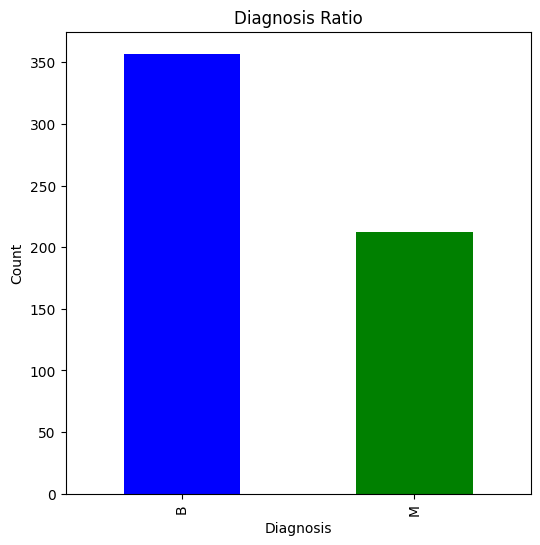

In [54]:
diagnosis_counts = data['diagnosis'].value_counts()

plt.figure(figsize=(6, 6))
diagnosis_counts.plot(kind='bar', color=['b', 'g'])
plt.title('Diagnosis Ratio')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

### b) Diagnosis depending on the radius mean and concavity

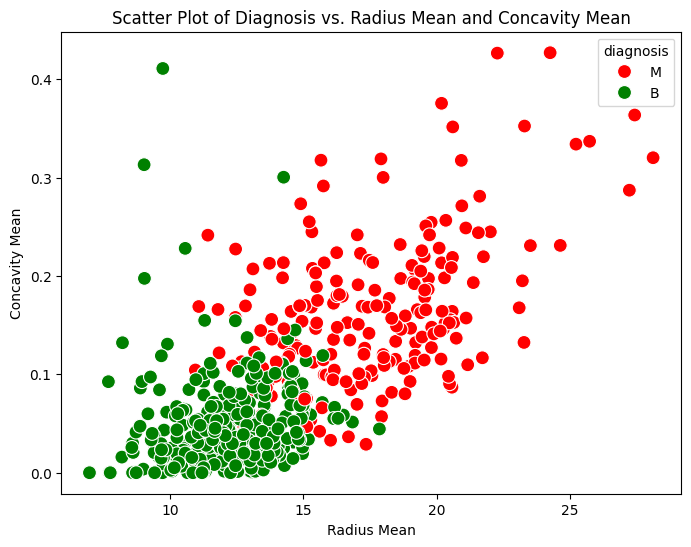

In [70]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='radius_mean', y='concavity_mean', data=data, hue='diagnosis', palette={'M': 'red', 'B': 'green'}, s=100)
plt.title('Scatter Plot of Diagnosis vs. Radius Mean and Concavity Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Concavity Mean')
plt.show()

### c) Area frequency histogram

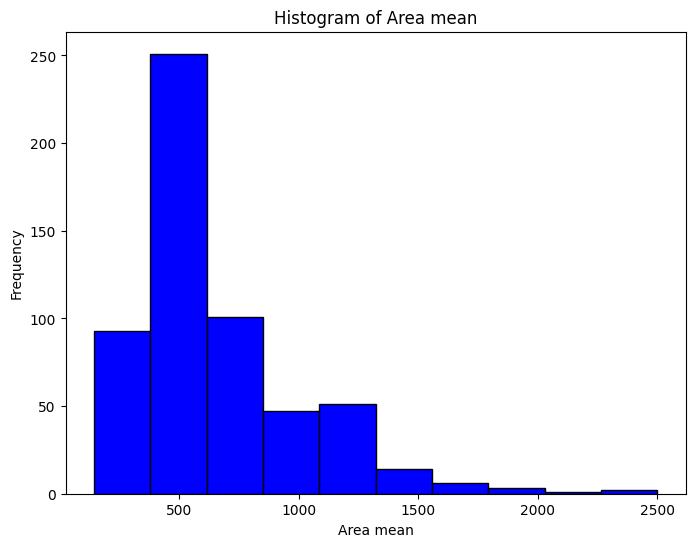

In [73]:
plt.figure(figsize=(8, 6))
plt.hist(data['area_mean'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Area mean')
plt.xlabel('Area mean')
plt.ylabel('Frequency')
plt.show()

### d) Compactness mean box-plot
1.5 IQR outlier borders

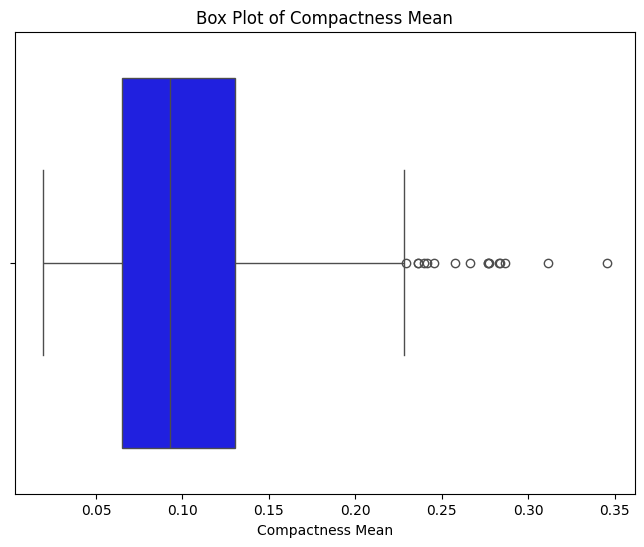

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['compactness_mean'], color='blue')
plt.title('Box Plot of Compactness Mean')
plt.xlabel('Compactness Mean')
plt.show()

### e) Correlation heatmap for means

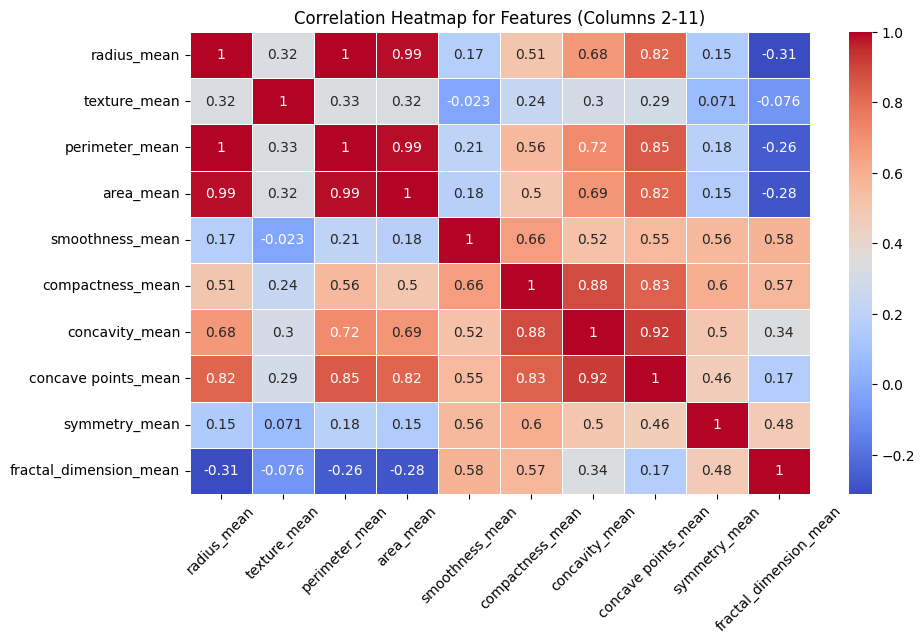

In [77]:
correlation_matrix = data.iloc[:, 2:12].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Features (Columns 2-11)')
plt.xticks(rotation=45)
plt.show()